In [4]:
import cv2

img = cv2.imread('mrbean.jpg', 1)
print(img.shape)

cv2.imshow('window', img)
cv2.waitKey()
cv2.destroyAllWindows

(168, 300, 3)


<function destroyAllWindows>

In [5]:
img = cv2.imread('mrbean.jpg', 0)
height, width = img.shape

print(height, width)

168 300


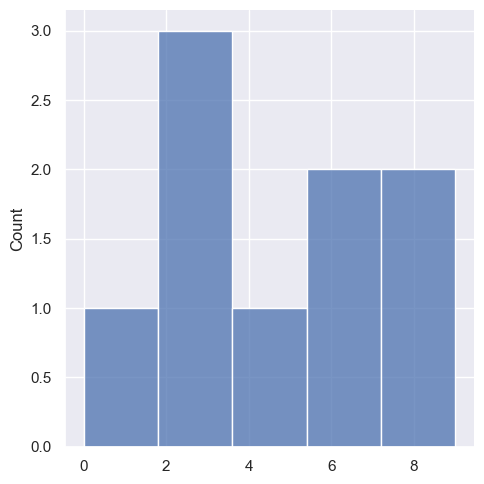

In [11]:
import seaborn as sns
import random
sns.set_theme()

data = [5, 3, 8, 7, 3, 2, 7, 0, 9]
sns.displot(data)

In [18]:
import seaborn as sns
import random
sns.set_theme()

# load image
img = cv2.imread('mrbean.jpg', 0)
height, width = img.shape

# ...
num_of_samples = 10000
sample_size = 30

means = []
for _ in range(num_of_samples):
    mean = 0
    for _ in range(sample_size):
        # generator a random point
        x = random.randint(0, height-1) 
        y = random.randint(0, width-1) 

        # get pixel value and add to mean
        mean = mean + img[x][y]         
    # normalize to get mean
    mean = mean/sample_size

    # add to list
    means.append(mean)

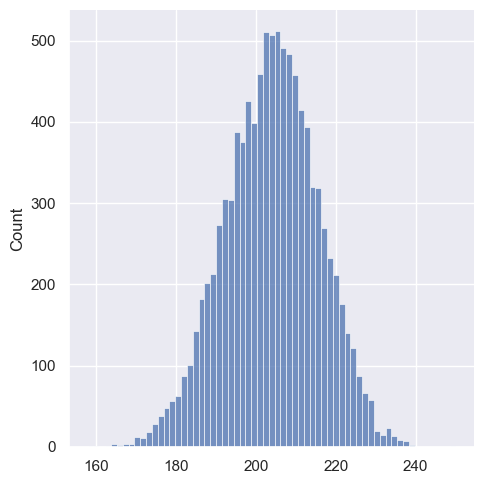

In [19]:
plot = sns.displot(means)
plot.savefig("out.png")

In [25]:
import random
import math

num_of_samples = 30000
sample_size = 30
side = 500

means = []
for _ in range(num_of_samples):
    mean=0
    for _ in range(sample_size):
        # generate a random point
        x = random.randint(0, side-1)
        y = random.randint(0, side-1)

        # distance to (0, 0)
        distance = math.sqrt(x*x + y*y)

        # get pixel value and add to mean
        mean = mean + distance
    # normalize to get mean
    mean = mean/sample_size
    
    # add to list
    means.append(mean)

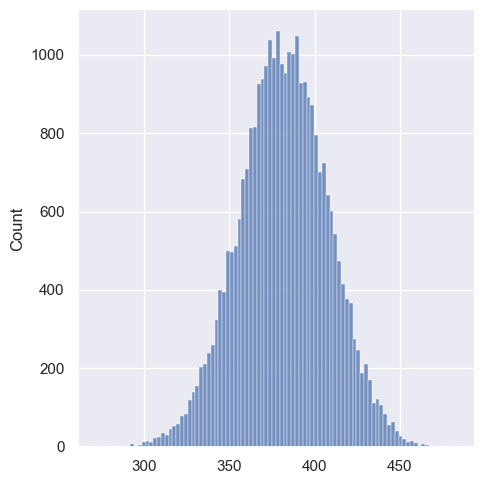

In [26]:
plot = sns.displot(means)
plot.savefig("out2.png")

In [35]:
# load image and blurring
import numpy as np
import cv2

# load image in grayscale mode
image = cv2.imread('mrbean.jpg', 0)

# create kernel
kernel = np.ones((5, 5), np.float32) / 25.0

# Compute mean for each pixel
dst = cv2.filter2D(image, cv2.CV_8U, kernel)

# show image
cv2.imshow('image', image)
cv2.imshow('dst', dst)

# waiting for any keys pressed and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [72]:
# load image and blurring
import numpy as np
import cv2

# load image in grayscale mode
image = cv2.imread('mrbean.jpg', 0)

# create kernel
kernel = np.ones((5, 5), np.float32) / 25.0

# Select ROI (top_y, top_x, height, width)
roi = image[10:70, 120:180]

# Compute mean for each pixel
roi = cv2.filter2D(roi, cv2.CV_8U, kernel)

image[10:70, 120:180] = roi

# show image
cv2.imshow('image', image)
cv2.imshow('roi', roi)

# waiting for any keys pressed and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [73]:
# numpy review
import numpy as np

arr = np.ones((5, 5))
print(arr)

roi = arr[1:4, 1:4]
roi = roi + 1
print(roi)

arr[1:4, 1:4] = roi
print(arr)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
[[1. 1. 1. 1. 1.]
 [1. 2. 2. 2. 1.]
 [1. 2. 2. 2. 1.]
 [1. 2. 2. 2. 1.]
 [1. 1. 1. 1. 1.]]


In [79]:
# load image and blurring using face detection

import numpy as np
import cv2

# face detection setup
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# load image in grayscale mode
image = cv2.imread('mrbean.jpg', 1)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# face detection
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw the rectangle around each face
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)

# show images
cv2.imshow('image', image)

# waiting for any keys pressed and clode windows
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

In [80]:
import numpy as np
import cv2

# face detection setup
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# load image in grayscale mode
image = cv2.imread('mrbean.jpg', 1)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# face detection
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw the rectangle around each face
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)
    roi = image[y:y+h, x:x+w]

    # compute mean for each pixel
    roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
    roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
    roi = cv2.filter2D(roi, cv2.CV_8U, kernel)

    # update
    image[y:y+h, x:x+w] = roi

# show images
cv2.imshow('image', image)

# waiting for any keys pressed and clode windows
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

In [81]:
import numpy as np

x = np.array([1, 4, 3, 6, 7])
print(x.mean())
print(x.var())

4.2
4.5600000000000005


In [84]:
import numpy as np
import cv2
import math
from scipy.ndimage import generic_filter

img = cv2.imread('img.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('edge_s1.jpg', gray)

x = gray.astype('float')
x_filt = generic_filter(x, np.std, size=7)
cv2.imwrite('edge_s2.jpg', x_filt)

x_filt[x_filt < 20] = 0
cv2.imwrite('edge_s3.jpg', x_filt)

maxv = np.max(x_filt)
print(maxv)

x_filt = x_filt*2.5
cv2.imwrite('edge_s4.jpg', x_filt)

105.59386017641098


True